In [17]:
import torch
import math

from torch import Tensor
from torch import optim
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
from torch import nn

from matplotlib import pyplot as plt

# for progress bar
from tqdm import tqdm, trange


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# for cross validation:
from sklearn.model_selection import KFold

# from the same folder:
# to load the data
import dlc_bci as bci
from models import *
import helpers
import antoine_models as ant
import luca_models as lm


import numpy as np

import sys


# get data

In [18]:
CRIT = 'cross'
HD_SIGNAL = True
train_input, test_input, train_target, test_target = helpers.get_data_as_numpy(HD_SIGNAL, CRIT)

<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])
<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])
train --- mean 24.05, std: 41.53 target mean:  0.49683544303797467
test --- mean 21.69, std: 40.85 target mean:  0.51


# Visualise the data

(28, 500)


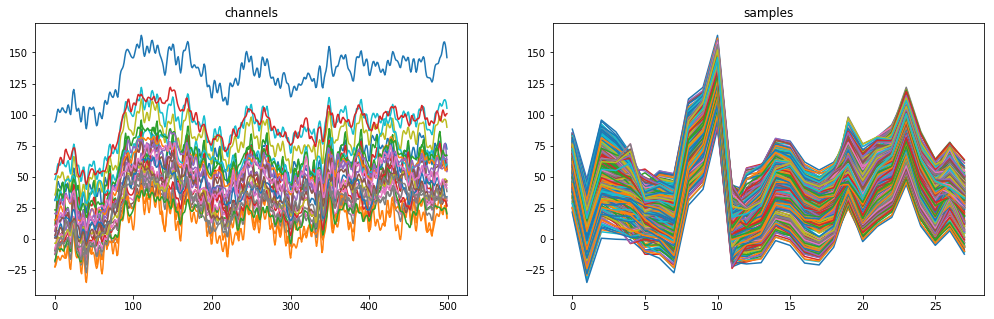

In [19]:
num_sample = 0

X = train_input
Y = train_target
X_test = test_input
Y_test = test_target

print(X[num_sample].shape)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17, 5))
ax1.plot(X[num_sample].transpose())
ax1.set_title('channels')

ax2.plot(X[num_sample])
ax2.set_title('samples')
plt.show()

x shape (316, 28, 500)
(159, 28, 500)
(157, 28, 500)
(28, 500)


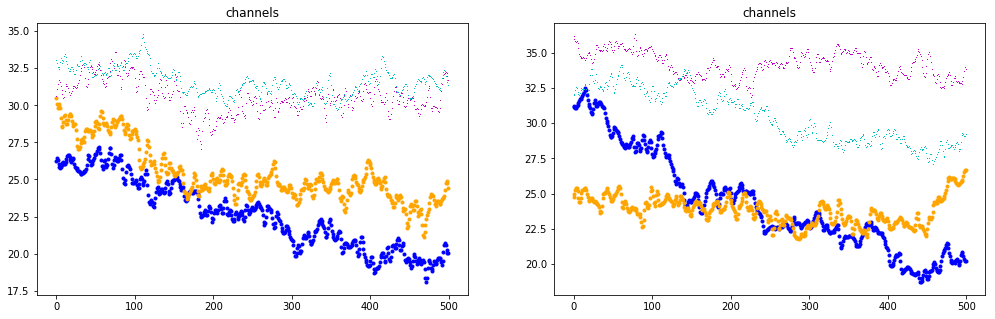

In [24]:
print('x shape',X.shape)
X_right = X[np.where(Y==0)]
X_left  = X[np.where(Y==1)]
X_test_right = X_test[np.where(Y_test==0)]
X_test_left  = X_test[np.where(Y_test==1)]
print(X_right.shape)
print(X_left.shape)

print(X[num_sample].shape)
half = 78


fig2, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17, 5))
ax1.plot(     X_right[:half].mean(1).mean(0),'.b')
ax1.plot(     X_left[:half].mean(1).mean(0),'.',color='orange')
ax1.plot(     X_left[:half].std(0).mean(0),',',color='m')
ax1.plot(     X_right[:half].std(0).mean(0),',',color='c')
ax1.set_title('channels')

ax2.plot(     X_right[half:].mean(1).mean(0),'.b')
ax2.plot(     X_left[half:].mean(1).mean(0),'.',color='orange')
ax2.plot(     X_left[half:].std(0).mean(0),',',color='m')
ax2.plot(     X_right[half:].std(0).mean(0),',',color='c')
ax2.set_title('channels')

"""ax2.plot(X[:158].mean(0).mean(0),'.b')
ax2.plot(X[158:].mean(1).mean(0),'.',color='orange')
ax2.set_title('samples')"""

"""ax2.plot(X_test.mean(0).mean(0),'.b')
#ax2.plot(X_test_left.mean(1).mean(0),'.',color='orange')
ax2.set_title('samples')"""
plt.show()


In [13]:
print(X_right.mean(axis=0).mean(0).reshape(-1,1).shape)

(500, 1)


In [14]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(np.array(range(500)).reshape(-1,1),X_right.mean(axis=0).mean(0))
lr.coef_

array([-0.01961251])

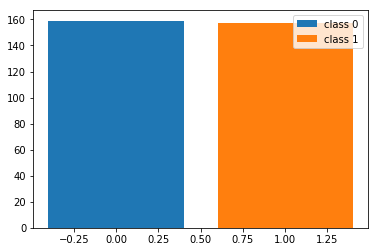

In [15]:
#check that the classes are equilibrated
unique, counts = np.unique(Y, return_counts=True)
to_plot = np.asarray((unique, counts))
for i in range(2):
    plt.bar(to_plot[0][i],to_plot[1][i],label='class '+str(i))
plt.legend()
plt.show()

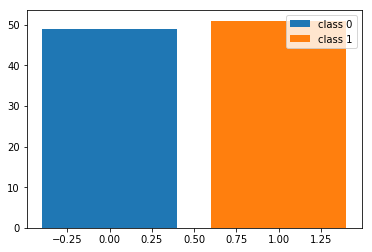

In [16]:
unique, counts = np.unique(Y_test, return_counts=True)
to_plot = np.asarray((unique, counts))
for i in range(2):
    plt.bar(to_plot[0][i],to_plot[1][i],label='class '+str(i))
plt.legend()
plt.show()